In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
import timeit


#### The dataset I studied was the "IBM HR Analytics Employee Attrition & Performance" dataset.  It contains information for over 1400 employees; information such as hourly rate, education levels, job and environment satisfaction, gender, distance from home, business travel, years at company, and years with current manager, among many other data points.  It also tells us whether or not that job or job position was lost due to attrition.  


In [282]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df = df.dropna()
df = df.drop_duplicates()

print(df.head())
print(df.shape)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

In [283]:
#splitting the data

X = df.drop('Attrition', 1)
Y = df['Attrition']

print(type(X))


<class 'pandas.core.frame.DataFrame'>


In [284]:
XD = pd.get_dummies(X, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 
                                'OverTime', 'Over18'])
#print(XD.head())
print(XD.shape)

(1470, 55)


In [285]:
#splitting the data into train and test groups.

train_XD, test_XD, train_Y, test_Y = train_test_split(XD, Y, test_size=.2, random_state=20)

## Initial Decision Tree:

In [286]:
# Initialize and train our tree.
initial_d_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
initial_d_tree.fit(train_XD, train_Y)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

##### Accuracy score:

In [287]:
tree_score = initial_d_tree.score(test_XD, test_Y)
tree_score_str = str(tree_score)
print(tree_score)

0.826530612244898


In [338]:
tree_runtime = timeit.timeit(stmt = tree_score_str, number = 10000)
print(tree_runtime)

0.00021750199812231585


##### Confusion Matrix to check accuracy of decision tree:

In [289]:
y_pred = initial_d_tree.predict(test_XD)

confusion_matrix(test_Y, y_pred)

array([[242,   1],
       [ 50,   1]], dtype=int64)

##### From looking at the results of the confusion matrix, I can say that overall our decision tree was successful at predicting attrition.  For 240 observations, the model correctly predicted that the loss of jobs were not due to attrition;  and for 13 observations, the model correctly predicted that the loss of jobs were due to attrition.

##### However we had 3 predictions that were actually false positives, and 38 predictions that were actually false negatives.

##### Cross Validation to check accuracy of decision tree:

In [290]:
cross_val_score(initial_d_tree, test_XD, test_Y, cv=10)

array([0.80645161, 0.83333333, 0.8       , 0.86206897, 0.79310345,
       0.72413793, 0.79310345, 0.82758621, 0.86206897, 0.82758621])

## Initial Random Forest Model:

In [291]:
rfc = ensemble.RandomForestClassifier(random_state=1330)
rfc.fit(XD, Y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1330, verbose=0,
            warm_start=False)

In [339]:
rf_score = cross_val_score(rfc, XD, Y, cv=10)
rf_score_str = str(rf_score)
print(rf_score)

[0.80405405 0.84459459 0.85135135 0.88435374 0.85714286 0.85034014
 0.84353741 0.85616438 0.84931507 0.85616438]


In [340]:
tree_runtime = timeit.timeit(stmt = rf_score_str, number = 10000)
print(tree_runtime)

SyntaxError: invalid syntax (<timeit-src>, line 2)

##### Confusion Matrix to check accuracy of random forest:

In [293]:
y_predrf = rfc.predict(test_XD)

confusion_matrix(test_Y, y_predrf)

array([[243,   0],
       [  9,  42]], dtype=int64)

From looking at the results of the confusion matrix for the random forest, I can say that overall our random forest was successful at predicting attrition.  For 243 observations, the model correctly predicted that the loss of jobs were not due to attrition;  and for 43 observations, the model correctly predicted that the loss of jobs were due to attrition.

We had zero false positives with our random forest model, and 6 predictions that were actually false negatives.

# Classification Report:

In [294]:
# Initialize and train our tree.
d_tree_cr = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
d_tree_cr.fit(XD, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

In [295]:
y_predcr = d_tree_cr.predict(XD)

class_names = ['Attrition', 'Not Attrition']

## Classification Report for decision tree:

In [296]:
tree_report = classification_report(Y, y_predcr, target_names=class_names)
print(tree_report)

               precision    recall  f1-score   support

    Attrition       0.86      0.98      0.92      1233
Not Attrition       0.69      0.19      0.30       237

  avg / total       0.84      0.86      0.82      1470



## Classification Report for Random Forest:

In [297]:
rfc_cr = ensemble.RandomForestClassifier()
rfc_cr.fit(XD, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
y_predfcr = rfc_cr.predict(XD)

In [299]:
forest_report = classification_report(Y, y_predfcr, target_names=class_names)
print(forest_report)

               precision    recall  f1-score   support

    Attrition       0.98      1.00      0.99      1233
Not Attrition       1.00      0.92      0.96       237

  avg / total       0.99      0.99      0.99      1470



# After feature reduction using selectKbest:

In [300]:
XD_skb = SelectKBest(chi2, k=5).fit_transform(XD, Y)
print(XD.shape)
print(XD_skb.shape)
print(Y.shape)

(1470, 55)
(1470, 5)
(1470,)


In [301]:
#After applying selectKbest, I split the data into train and test groups.

train_XD2, test_XD2, train_Y2, test_Y2 = train_test_split(XD_skb, Y, test_size=.2, random_state=20)


## SelectKbest Decision Tree:

In [302]:
# Initialize and train our tree.
skb_d_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
skb_tree_fit = skb_d_tree.fit(train_XD2, train_Y2)

##### Accuracy score:

In [303]:
print(skb_tree_fit.score(test_XD2, test_Y2))


0.8129251700680272


##### Confusion Matrix to check accuracy of decision tree:

In [304]:
y_pred2 = skb_tree_fit.predict(test_XD2)

confusion_matrix(test_Y2, y_pred2)

array([[233,  10],
       [ 45,   6]], dtype=int64)

##### Cross validation to check accuracy of our decision tree, after selectkbest:

In [305]:
cross_val_score(skb_tree_fit, XD_skb, Y, cv=10)

array([0.82432432, 0.83783784, 0.81081081, 0.82993197, 0.81632653,
       0.82993197, 0.80272109, 0.82876712, 0.83561644, 0.84931507])

## SelectKbest Random Forest Model:

In [306]:
rfc2 = ensemble.RandomForestClassifier(random_state=1330)
rfc2_mfit = rfc2.fit(XD_skb, Y)

##### Accuracy score:

In [307]:
cross_val_score(rfc2_mfit, XD_skb, Y, cv=10)

array([0.82432432, 0.81081081, 0.83783784, 0.81632653, 0.79591837,
       0.80272109, 0.83673469, 0.81506849, 0.84246575, 0.82191781])

##### Confusion matrix to check accuracy of random forest model, after selectkbest:

In [308]:
y_predrf2 = rfc2.predict(test_XD2)

confusion_matrix(test_Y2, y_predrf2)

array([[243,   0],
       [ 12,  39]], dtype=int64)

## Classification report after selectKbest:

### Classification Report for decision tree:

In [309]:
# Initialize and train our tree.
skb_tree_cr = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
skb_tree_cr.fit(XD_skb, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

In [310]:
y_pred_skbcr = skb_tree_cr.predict(XD_skb)

class_names = ['Attrition', 'Not Attrition']

In [311]:
tree_report2 = classification_report(Y, y_pred_skbcr, target_names=class_names)
print(tree_report2)

               precision    recall  f1-score   support

    Attrition       0.86      0.98      0.92      1233
Not Attrition       0.68      0.20      0.31       237

  avg / total       0.83      0.86      0.82      1470



#### Precision in our classification report represents how good our model is at predicting the true positives, and avoiding false positives.  After applying selectKbest and reducing the features in our data from 55 to 5, the precision ratio went down from .84 to .83, suggesting the decrease was not significant.  However, the decrease in features most likely made our model quicker in execution.  

#### The recall represents the ability of our model to find all the positive samples.  The ratio did not change after applying selectKbest.  

### Classification Report for random forest:

In [312]:
rfc2_cr = ensemble.RandomForestClassifier()
rfc2_cr.fit(XD_skb, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [313]:
y_pred2_skbcr = rfc2_cr.predict(XD_skb)

class_names = ['Attrition', 'Not Attrition']

In [314]:
rfc2_report2 = classification_report(Y, y_pred2_skbcr, target_names=class_names)
print(rfc2_report2)

               precision    recall  f1-score   support

    Attrition       0.97      1.00      0.98      1233
Not Attrition       0.99      0.82      0.90       237

  avg / total       0.97      0.97      0.97      1470



#### Precision in our classification report represents how good our model is at predicting the true positives, and avoiding false positives.  After applying selectKbest and reducing the features in our data from 55 to 5, the precision ratio went down from .99 to .98, suggesting the decrease was not significant.  However, the decrease in features most likely made our model quicker in execution.  

#### The recall represents the ability of our model to find all the positive samples.  This ratio slightly decreased after applying selectKbest from .99 to .98. 

# After PCA:

In [315]:
corrmat = XD.corr()
#print(corrmat)


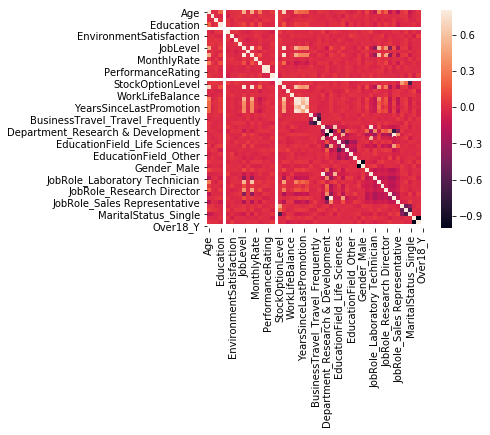

In [316]:

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [317]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o


XD = StandardScaler().fit_transform(XD)



#scaler = StandardScaler()
# Fit on training set only.
#scaler.fit(train_XD)
# Apply transform to both the training set and the test set.
#train_XD = scaler.transform(train_XD)
#test_XD = scaler.transform(test_XD)

print(XD.shape)

(1470, 55)


In [318]:
#Apply PCA

pca = PCA(.95)
pca_XD = pca.fit_transform(XD)

comp_no = pca.n_components_
comp_var_ratio = pca.explained_variance_ratio_

#print(comp_no)
#print(comp_var_ratio)
#print(p_components)

In [319]:
pca_df = pd.DataFrame(data=pca_XD)
#print(pca_df.head())
print(pca_df.shape)

(1470, 34)


In [320]:
#After applying selectKbest, I split the data into train and test groups.

train_XD3, test_XD3, train_Y3, test_Y3 = train_test_split(pca_XD, Y, test_size=.2, random_state=20)

print(pca_XD.shape)


(1470, 34)


## Decision Tree after PCA: 

In [321]:
# Initialize and train our tree.
pca_d_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
pca_w_dtree = pca_d_tree.fit(train_XD3, train_Y3)



##### accuracy score:

In [322]:

print(pca_w_dtree.score(test_XD3, test_Y3))

0.8129251700680272


##### Confusion matrix to check accuracy of decision tree, after PCA:

In [323]:
y_pred3 = pca_w_dtree.predict(test_XD3)

confusion_matrix(test_Y, y_pred3)

array([[237,   6],
       [ 49,   2]], dtype=int64)

##### Cross validation to check accuracy of decision tree, after PCA:

In [324]:
cross_val_score(pca_w_dtree, pca_XD, Y, cv=10)

array([0.83108108, 0.81081081, 0.80405405, 0.84353741, 0.82993197,
       0.82993197, 0.81632653, 0.82876712, 0.84246575, 0.84246575])

## PCA Random Forest Model:

In [325]:
rfc3 = ensemble.RandomForestClassifier(random_state=1330)
rfc3_mfit = rfc3.fit(pca_XD, Y)

##### Accuracy score:

In [326]:
cross_val_score(rfc3_mfit, pca_XD, Y, cv=10)

array([0.84459459, 0.84459459, 0.84459459, 0.84353741, 0.82993197,
       0.84353741, 0.83673469, 0.85616438, 0.86986301, 0.8630137 ])

##### Confusion matrix to check accuracy score, after PCA:

In [327]:
y_predrf3 = rfc3.predict(test_XD3)

confusion_matrix(test_Y3, y_predrf3)

array([[243,   0],
       [  7,  44]], dtype=int64)

# Classification report after PCA:

### Classification report for decision tree:

In [328]:
# Initialize and train our tree.
pca_tree_cr = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
pca_tree_cr.fit(pca_XD, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

In [329]:
y_pred_pcacr = pca_tree_cr.predict(pca_XD)

class_names = ['Attrition', 'Not Attrition']

In [330]:
tree_report3 = classification_report(Y, y_pred_pcacr, target_names=class_names)
print(tree_report3)

               precision    recall  f1-score   support

    Attrition       0.87      0.99      0.92      1233
Not Attrition       0.80      0.20      0.32       237

  avg / total       0.86      0.86      0.83      1470



#### Precision in our classification report represents how good our model is at predicting the true positives, and avoiding false positives.  After applying PCA and reducing the features and dimensionality in our data from 55 to 34, the precision ratio actually went up to .84 to .86, making the model more precise.  The decrease in features and dimensionality most likely made our model quicker in execution.  

#### The recall represents the ability of our model to find all the positive samples.  After applying PCA, the recall ratio did not change.

### Classification report for random forest after pca:

In [331]:
rfc_pcacr = ensemble.RandomForestClassifier()
rfc_pcacr.fit(pca_XD, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [332]:
y_pred2_pcacr = rfc_pcacr.predict(pca_XD)

In [333]:
forest_report3 = classification_report(Y, y_pred2_pcacr, target_names=class_names)
print(forest_report3)

               precision    recall  f1-score   support

    Attrition       0.99      1.00      0.99      1233
Not Attrition       1.00      0.93      0.96       237

  avg / total       0.99      0.99      0.99      1470



#### Precision in our classification report represents how good our model is at predicting the true positives, and avoiding false positives.  After applying PCA and reducing the features and dimensionality in our data from 55 to 34, the precision ratio slightly went down to .98 from .99.  This slight decrease in precision is warranted because our model became more efficient and quicker in execution due to the decrease in features and dimension.  The decrease in features and dimensionality most likely made our model quicker in execution. 

#### The recall represents the ability of our model to find all the positive samples.  After applying PCA, this ratio slightly went down to .98 from .99.